# 決定木

例えば、メールがスパムメールかそうでないかを分類する例を考えると
今までの学習手法だとどの単語によってスパムメールと判断されたかがわかりません。
なので、スパムメールに含まれる単語を見つけるには分類過程を知る必要があります。
今回学習する決定木の一番の特徴は、分類過程が明瞭ということです。

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data[:,2:]
y = iris.target
model = DecisionTreeClassifier().fit(x,y)

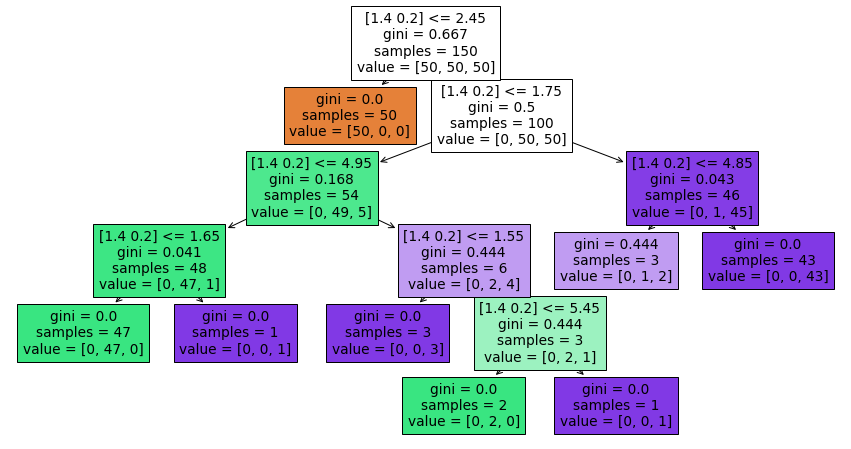

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
plot_tree(model, feature_names=iris.data[:,2:], ax=ax, filled=True);

````
criterion・・・　分類基準（giniとentropyがある）
不純度には二つの指標があり、
一つ目はジニ不純度(gini)
二つ目が情報エントロピー(entopy)。
不純度は、ひとつのノード内に複数のクラスがどれだけ混在(混ざっているか)しているかを表す指標。
max_depth・・・　木の深さ
min_samples_leaf・・・　分割するときに必要なデータ数
````

## ランダムフォレスト

ランダムフォレストとは決定木を拡張したもので、分類、回帰、クラスタリングに用いることが可能な機械学習のアルゴリズムのひとつ  
ランダムフォレストは、複数の決定木でアンサンブル学習を行う手法になります。  
アンサンブル学習とは、複数の学習器を用いて学習を行う手法です。　　  
複数の学習器で学習することによって、精度が高くなると一般的に言われています。

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data[:, 2:] # 花びらの長さと幅
y = iris.target
model = DecisionTreeClassifier().fit(x,y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
clf_rf = RandomForestClassifier(n_estimators=30, random_state=0)
clf_rf = clf_rf.fit(x_train, y_train)

In [5]:
def measure_performance(x,y,clf, show_accuracy=True,show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(x)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)), "\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")

    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")


measure_performance(x_train, y_train, clf_rf)

NameError: name 'metrics' is not defined

````
Accuracy:0.874
Classification report
precision    recall  f1-score   support
0.0       0.86      0.97      0.91       662
1.0       0.91      0.68      0.78       322
avg / total       0.88      0.87      0.87       984
Confussion matrix
[[641  21]
[103 219]]
````

MSE train : 1.462, test : 14.277
MSE train : 0.983, test : 0.829


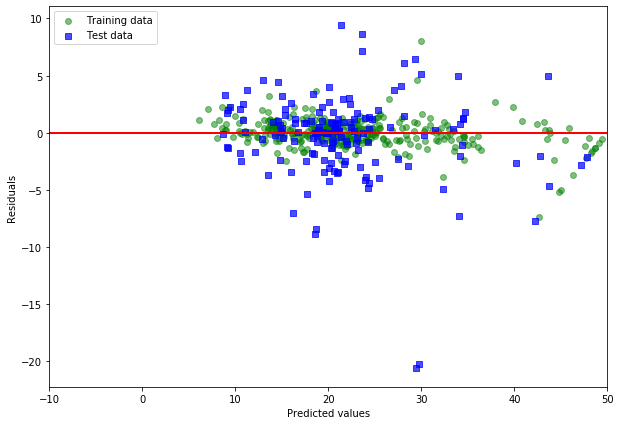

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# ボストン近郊の住宅データの読み込み
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

# 説明変数及び目的変数
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values

# 学習用、検証用データに分割
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 0)

# モデル構築
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )

# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

# 残差プロット
# %matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'green', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'blue', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()